# Breast Cancer Detection using KNN

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score,classification_report

In [105]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=["id","clump_thickness","uniformity_cell_size","uniformity_cell_shape","marginal_adhesion",
       "single_epithelial_cell_size","bare_nuclei","bland_cromatin","normal_nucleoli","mitosis","class"]

In [106]:
df = pd.read_csv(url,names=names)

In [107]:
df.head()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_cromatin,normal_nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [108]:
df.shape

(699, 11)

In [109]:
df.replace('?',-99999,inplace=True)

In [110]:
df.axes

[RangeIndex(start=0, stop=699, step=1),
 Index(['id', 'clump_thickness', 'uniformity_cell_size',
        'uniformity_cell_shape', 'marginal_adhesion',
        'single_epithelial_cell_size', 'bare_nuclei', 'bland_cromatin',
        'normal_nucleoli', 'mitosis', 'class'],
       dtype='object')]

In [111]:
df.columns


Index(['id', 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_cromatin',
       'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')

In [112]:
df.drop(['id'],1,inplace=True)

In [113]:
df.shape

(699, 10)

In [114]:
df.describe()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_cromatin,normal_nucleoli,mitosis,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


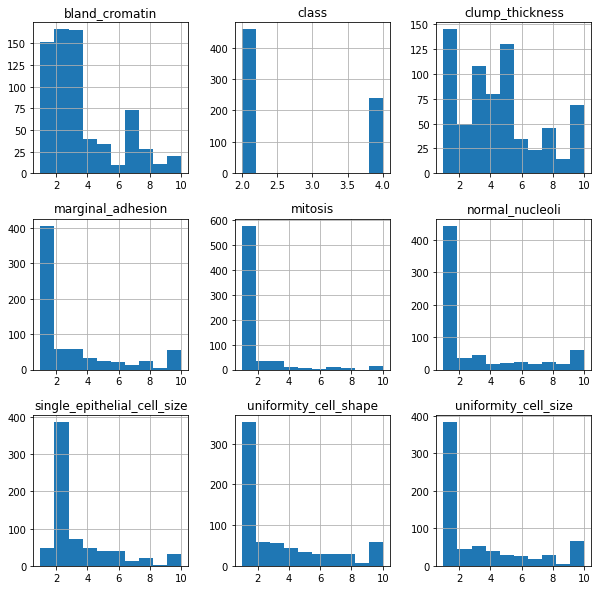

In [115]:
df.hist(figsize=(10,10))
plt.show()

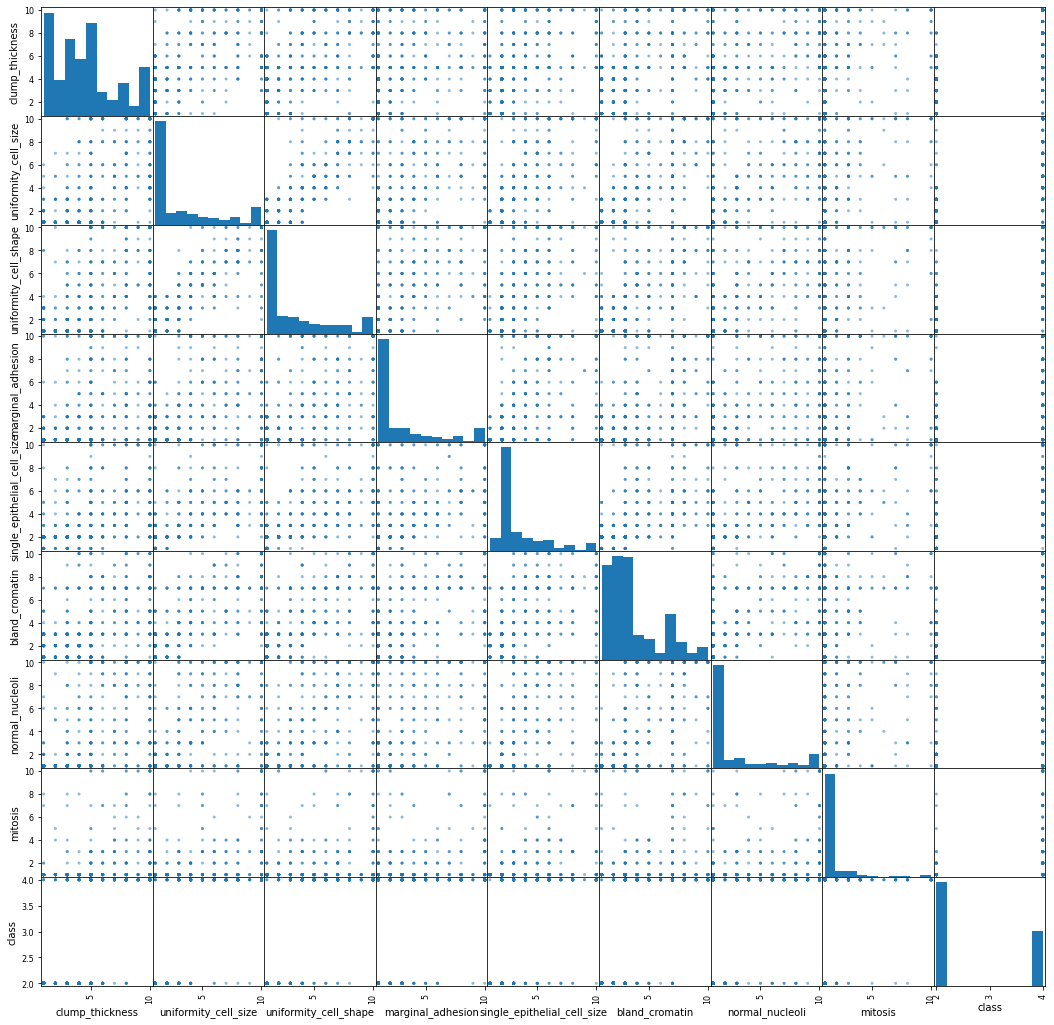

In [116]:
scatter_matrix(df,figsize=(18,18))
plt.show()

In [117]:
X = np.array(df.drop(['class'],1))
Y = np.array(df['class'])

In [118]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.2,stratify=Y)

In [119]:
acc=[]
neighbors = []
for i in range(1,25,1): 
    kfold = model_selection.KFold(n_splits=10,shuffle=False)
    cv_results = model_selection.cross_val_score(KNeighborsClassifier(n_neighbors=i),X_train,Y_train,scoring='accuracy',cv=kfold)
    acc.append(cv_results.mean())
    neighbors.append(i)

Text(0, 0.5, 'accuracy')

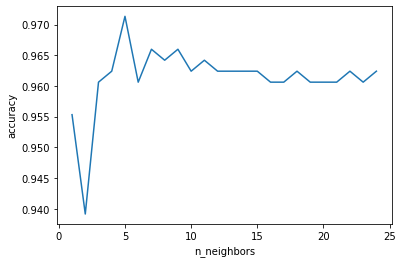

In [120]:
plt.plot(neighbors,acc)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

In [121]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))

In [122]:
results = []
names = []

In [123]:
for name,model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=False)
    cv_results = model_selection.cross_val_score(model,X_train,Y_train,scoring='accuracy',cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = '{} {} ({})'.format(name,cv_results.mean(),cv_results.std())

    print(msg)

KNN 0.9713311688311688 (0.016517041445764418)


In [124]:
for name,model in models:
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(Y_test,predictions))
    print(classification_report(Y_test,predictions,zero_division=1))

KNN
0.9785714285714285
              precision    recall  f1-score   support

           2       0.97      1.00      0.98        92
           4       1.00      0.94      0.97        48

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140

